# **Project: Document Scanning for Book Pages**

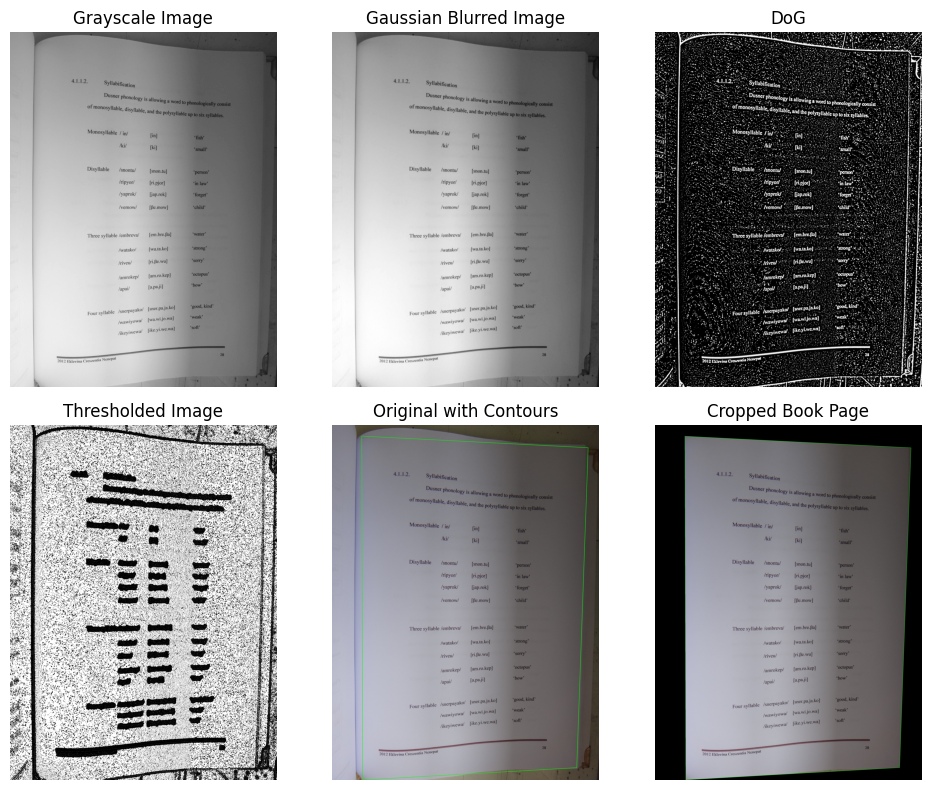

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('linguistics_thesis_a.jpg')

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Plot the original grayscale image
plt.figure(figsize=(10, 8))
plt.subplot(2, 3, 1)
plt.imshow(gray, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')

# Apply Gaussian Blur to reduce noise
blurred = cv2.GaussianBlur(gray, (11, 11), 0)

# Plot the blurred image
plt.subplot(2, 3, 2)
plt.imshow(blurred, cmap='gray')
plt.title("Gaussian Blurred Image")
plt.axis('off')

# Use Difference of Gaussians (DoG) for blob detection
# Gaussian filter 1
gaussian1 = cv2.GaussianBlur(blurred, (21, 21), 0)
# Gaussian filter 2
gaussian2 = cv2.GaussianBlur(blurred, (51, 51), 0)

#DoG
dog = gaussian1 - gaussian2

# Plot the Difference of Gaussians result
plt.subplot(2, 3, 3)
plt.imshow(dog, cmap='gray')
plt.title("DoG")
plt.axis('off')

# threshold DoG for blobs
_, thresh = cv2.threshold(dog, 0, 255, cv2.THRESH_BINARY_INV + cv2.ADAPTIVE_THRESH_MEAN_C)

# Plot the thresholded image
plt.subplot(2, 3, 4)
plt.imshow(thresh, cmap='gray')
plt.title("Thresholded Image")
plt.axis('off')

# contours for blobs
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Sort contours by area (to find the largest one, which is likely the page)
contours = sorted(contours, key=cv2.contourArea, reverse=True)

# Loop through contours and select the largest (book page)
for contour in contours:
    # Approximate the contour and check if it forms a rectangular shape
    epsilon = 0.04 * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)

    # If the contour has 4 points, it is likely the book page
    if len(approx) == 4:
        book_page_contour = approx
        break

# Draw the contour of the book page on the original image
cv2.drawContours(image, [book_page_contour], -1, (0, 255, 0), 3)

# Plot the image with the contour of the book page
plt.subplot(2, 3, 5)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original with Contours")
plt.axis('off')

# Crop the book page region from the image
mask = np.zeros(gray.shape, dtype=np.uint8)
cv2.drawContours(mask, [book_page_contour], -1, 255, -1)
book_page = cv2.bitwise_and(image, image, mask=mask)

# Plot the cropped book page
plt.subplot(2, 3, 6)
plt.imshow(cv2.cvtColor(book_page, cv2.COLOR_BGR2RGB))
plt.title("Cropped Book Page")
plt.axis('off')

# Show all plots
plt.tight_layout()
plt.show()

